In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calendarDF = pd.read_csv("data/calendar.csv", sep=',')

In [3]:
listingDF = pd.read_csv("data/listings.csv", sep=',')

## Rows count per Feature

In [4]:
calendarDF.count()

listing_id    21841235
date          21841235
available     21841235
price          8618452
metro_area    21841235
dtype: int64

## Data types Features

In [5]:
calendarDF.dtypes

listing_id      int64
date           object
available      object
price         float64
metro_area     object
dtype: object

## Dataset Dictionary

- **Listing_ID:** It is an unique ID by estate.
- **Date:** It is the sample date.
- **Available:** This field indicates if the estate is avaiable or not.
- **Price:** It is the estate Price per night.
- **Metro_area:** City


## Numeric features Description

In [6]:
calendarDF['price'].describe()

count    8.618452e+06
mean     1.772158e+02
std      2.716685e+02
min      1.000000e+01
25%      7.500000e+01
50%      1.200000e+02
75%      2.000000e+02
max      2.000000e+04
Name: price, dtype: float64

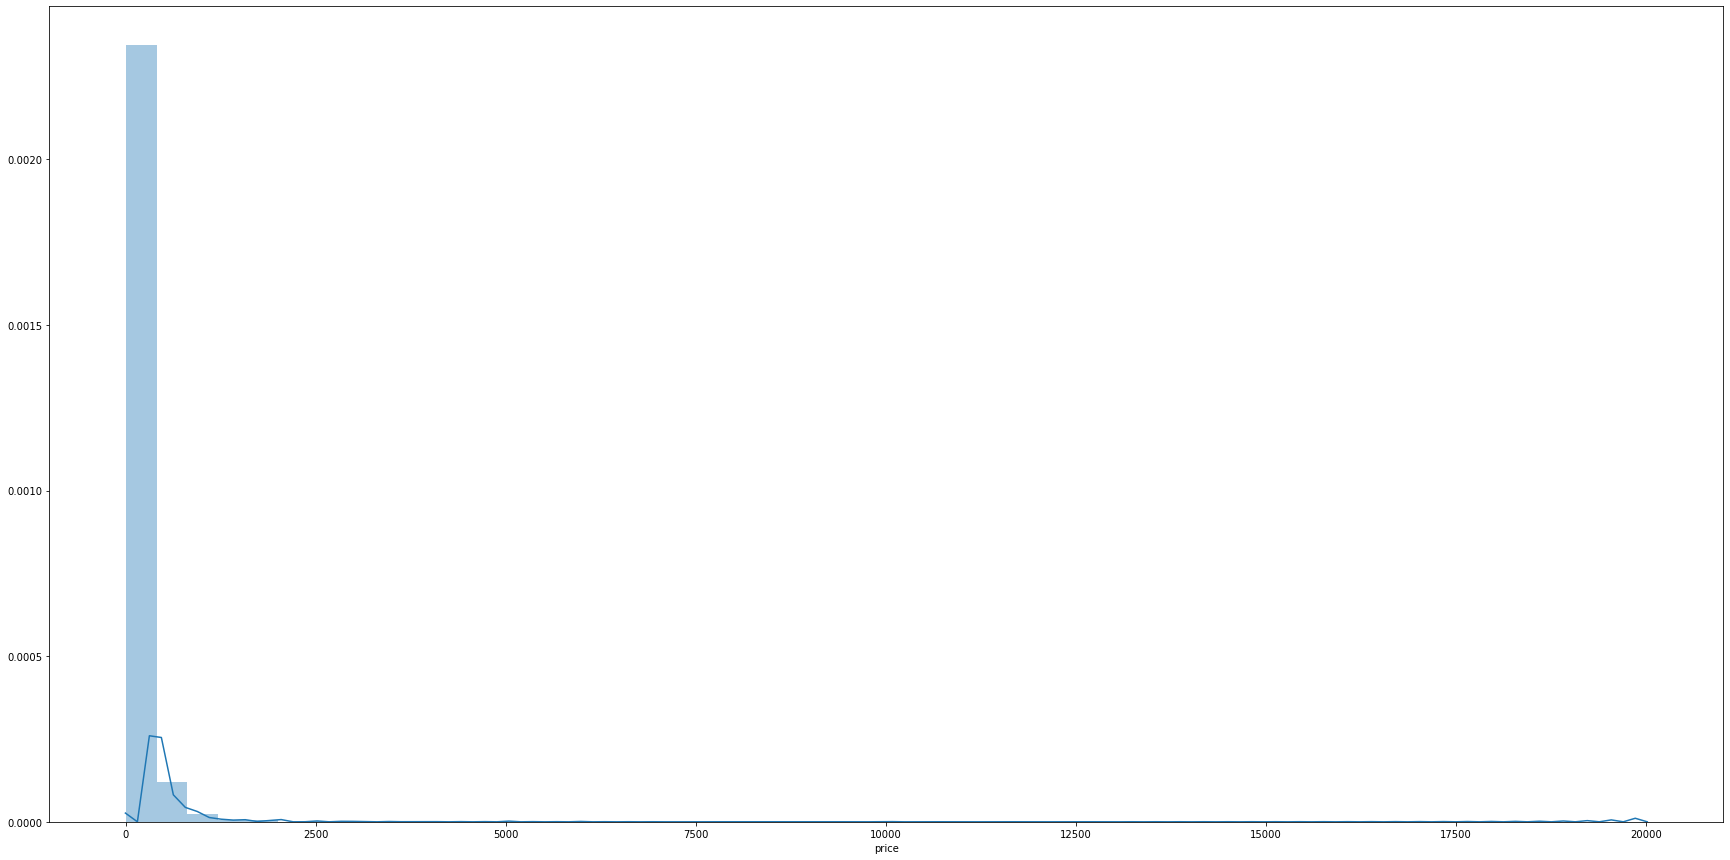

In [7]:
fig,ax = plt.subplots(figsize=(30,15))
sns.distplot(calendarDF["price"])

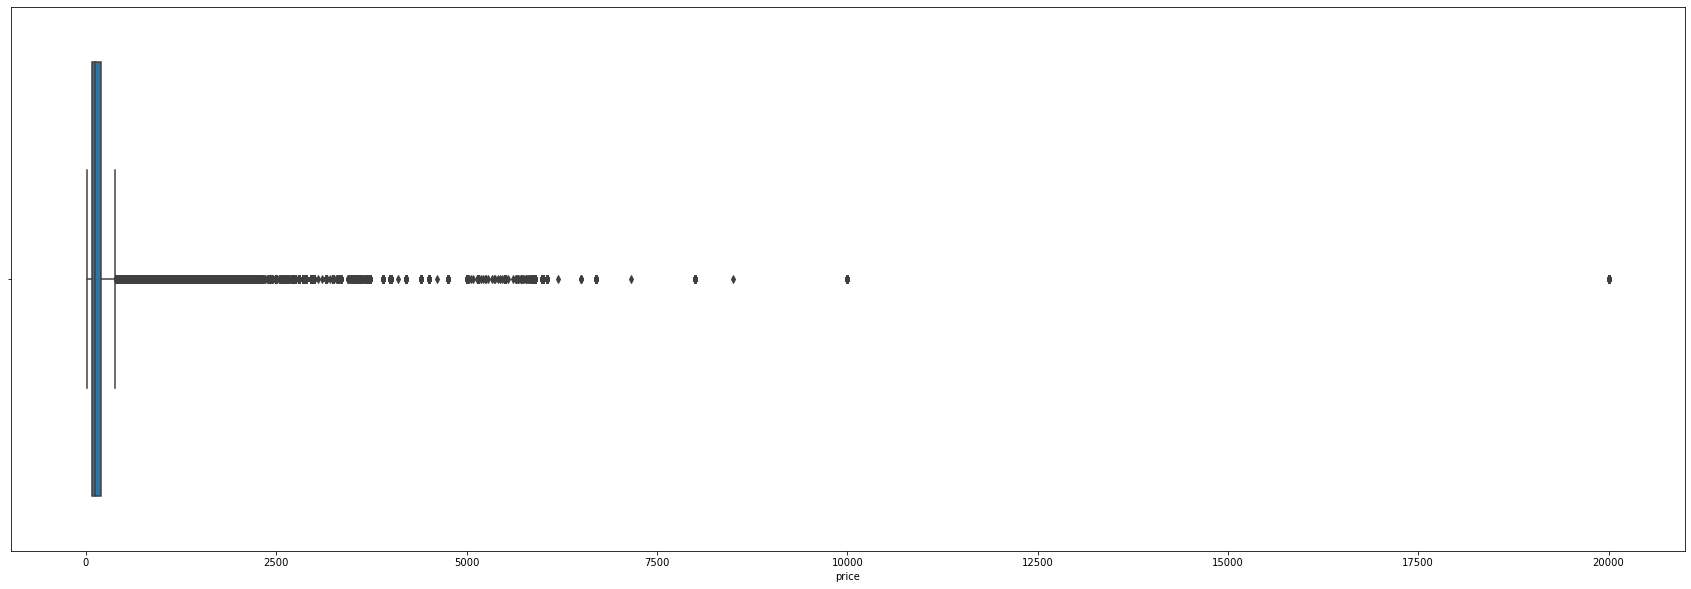

In [8]:
fig,ax = plt.subplots(figsize=(30,10))
sns.boxplot(x=calendarDF["price"])

### Removing outliers

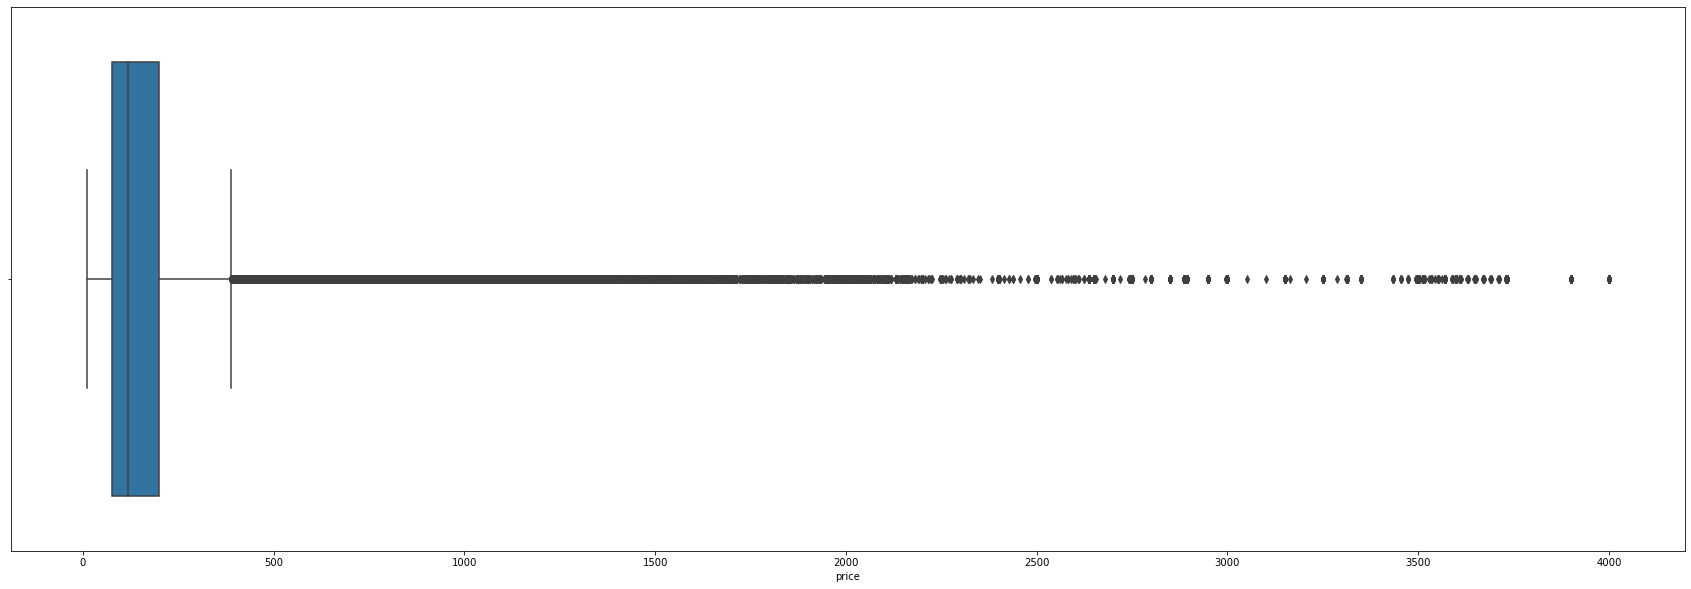

In [9]:
fig,ax = plt.subplots(figsize=(30,10))

filteredCalendarDF = calendarDF[calendarDF['price'] < 4000]
sns.boxplot(x=filteredCalendarDF["price"])

## Datetime feature Description

In [10]:
# Revisar el formato
calendarDF['date'].head()

0    2018-03-05
1    2018-03-04
2    2018-03-03
3    2018-03-02
4    2018-03-01
Name: date, dtype: object

### Casting datatype

In [11]:
calendarDF['date'] = pd.to_datetime(calendarDF['date']) 
calendarDF = calendarDF.sort_values(by='date')

# Oldest and earliest date

print(calendarDF['date'].head(1))
print(calendarDF['date'].tail(1))

15246780   2016-05-17
Name: date, dtype: datetime64[ns]
19135125   2018-05-10
Name: date, dtype: datetime64[ns]


### Creating year and month feature

In [12]:
calendarDF['yearDate'] = calendarDF['date'].dt.year
calendarDF['yearDate'] = calendarDF['yearDate'].astype('category')
aggYear = calendarDF.groupby('yearDate').size()
years = aggYear.index

calendarDF['monthDate'] = calendarDF['date'].dt.month
calendarDF['monthDate'] = calendarDF['monthDate'].astype('category')
aggMonth = calendarDF.groupby('monthDate').size()
months = aggMonth.index

In [13]:
calendarDF.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
metro_area            object
yearDate            category
monthDate           category
dtype: object

### Analysis per year

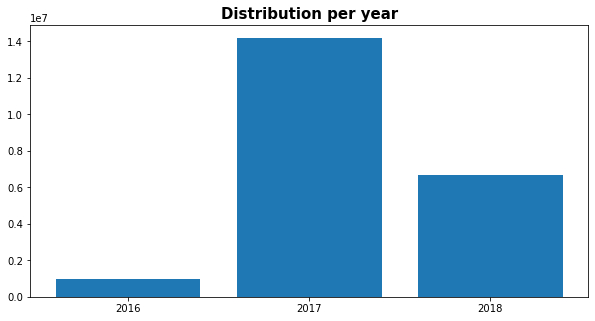

In [14]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(years, aggYear)
plt.title('Distribution per year', fontsize=15, fontweight="bold")
plt.xticks([2016, 2017, 2018])
plt.show()

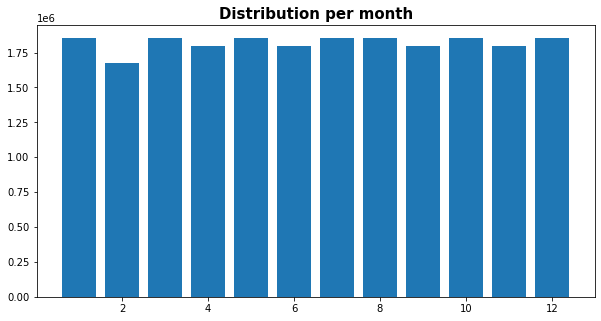

In [15]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(months, aggMonth)
plt.title('Distribution per month', fontsize=15, fontweight="bold")
plt.show()

In [16]:
calendarDF['yearDate'].unique()

[2016, 2017, 2018]
Categories (3, int64): [2016, 2017, 2018]

### Distribution per city

Text(0.5, 1.0, 'Distribution per city')

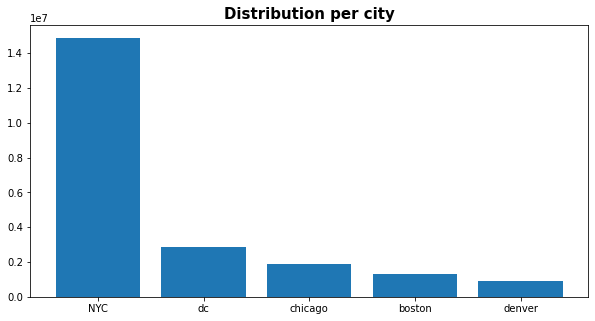

In [17]:
fig,ax = plt.subplots(figsize=(10,5))

cityDistribution = calendarDF['metro_area'].value_counts().to_frame().reset_index().rename(columns={'index': 'ciudad', 'metro_area': 'cantidad'})
ax.bar(cityDistribution['ciudad'], cityDistribution['cantidad'])
plt.title('Distribution per city', fontsize=15, fontweight="bold")

### Price variation per year

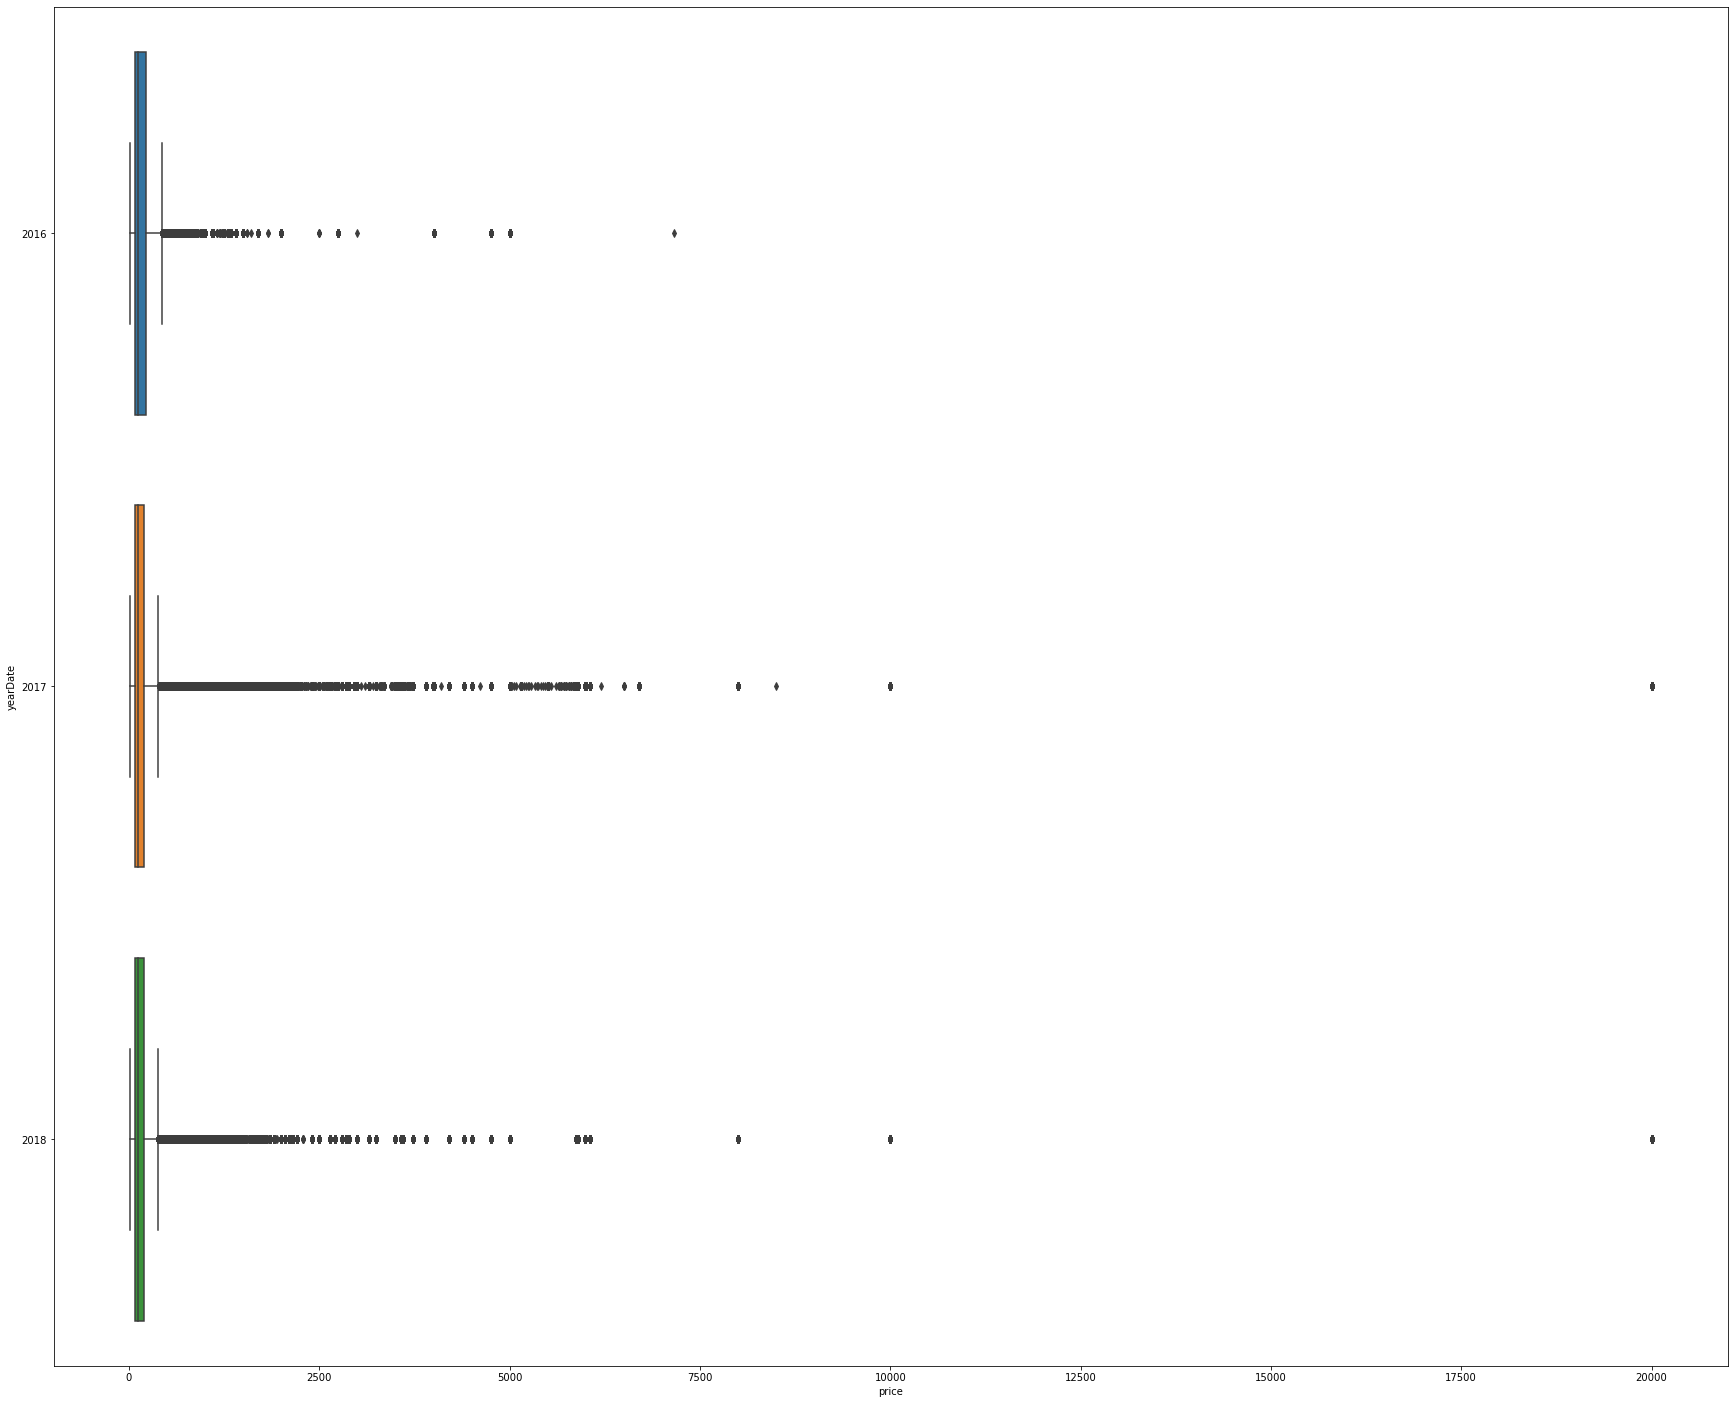

In [18]:
filteredCalendarDF = calendarDF.dropna(subset=['yearDate'])

fig,ax = plt.subplots(figsize=(30,25))
sns.boxplot(y=calendarDF['yearDate'], x=calendarDF['price'])
plt.show()

## Categorical variables Description

In [19]:
calendarDF.count()

listing_id    21841235
date          21841235
available     21841235
price          8618452
metro_area    21841235
yearDate      21841235
monthDate     21841235
dtype: int64

In [20]:
calendarDF['available'].unique()
calendarDF['available'] = calendarDF['available'].astype('category')
calendarDF.dtypes

listing_id             int64
date          datetime64[ns]
available           category
price                float64
metro_area            object
yearDate            category
monthDate           category
dtype: object

In [21]:
calendarDF.groupby('available').size()

available
f    13222783
t     8618452
dtype: int64

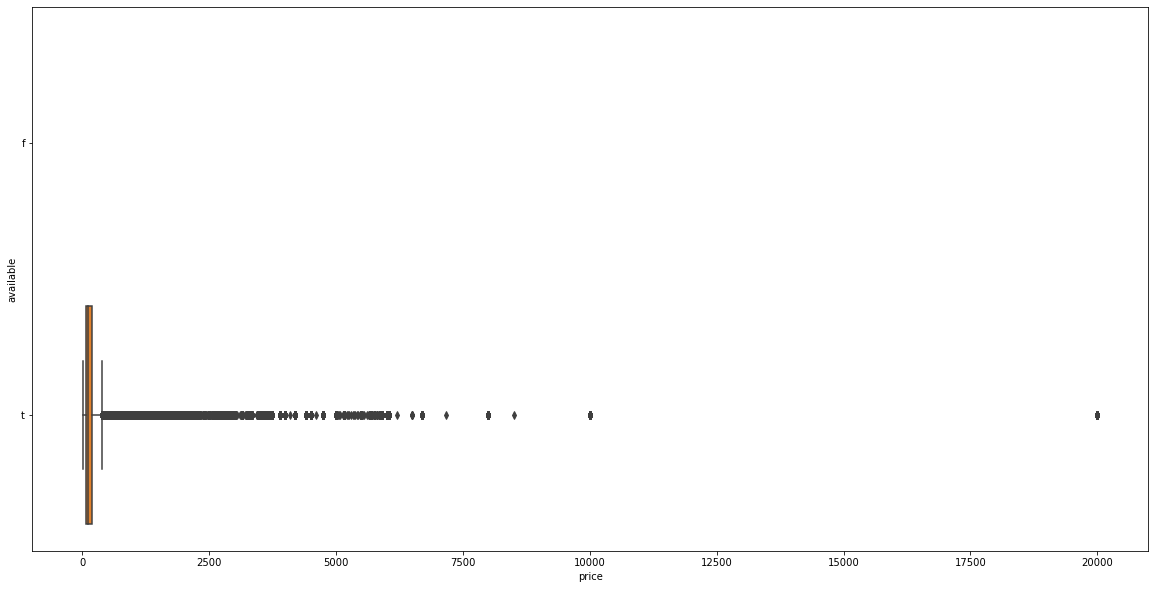

In [22]:
fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(y=calendarDF['available'], x=calendarDF['price'])

In [23]:
calendarDF['listing_id'] = calendarDF['listing_id'].astype('string')
calendarDF['listing_id'].head()

15246780     8403139
15404095     9491180
15601560     1197430
15427455    12292295
15058440     2139342
Name: listing_id, dtype: string

In [24]:
calendarDF['metro_area'] = calendarDF['metro_area'].astype('category')
calendarDF['metro_area'].unique()

['denver', 'boston', 'NYC', 'chicago', 'dc']
Categories (5, object): ['denver', 'boston', 'NYC', 'chicago', 'dc']

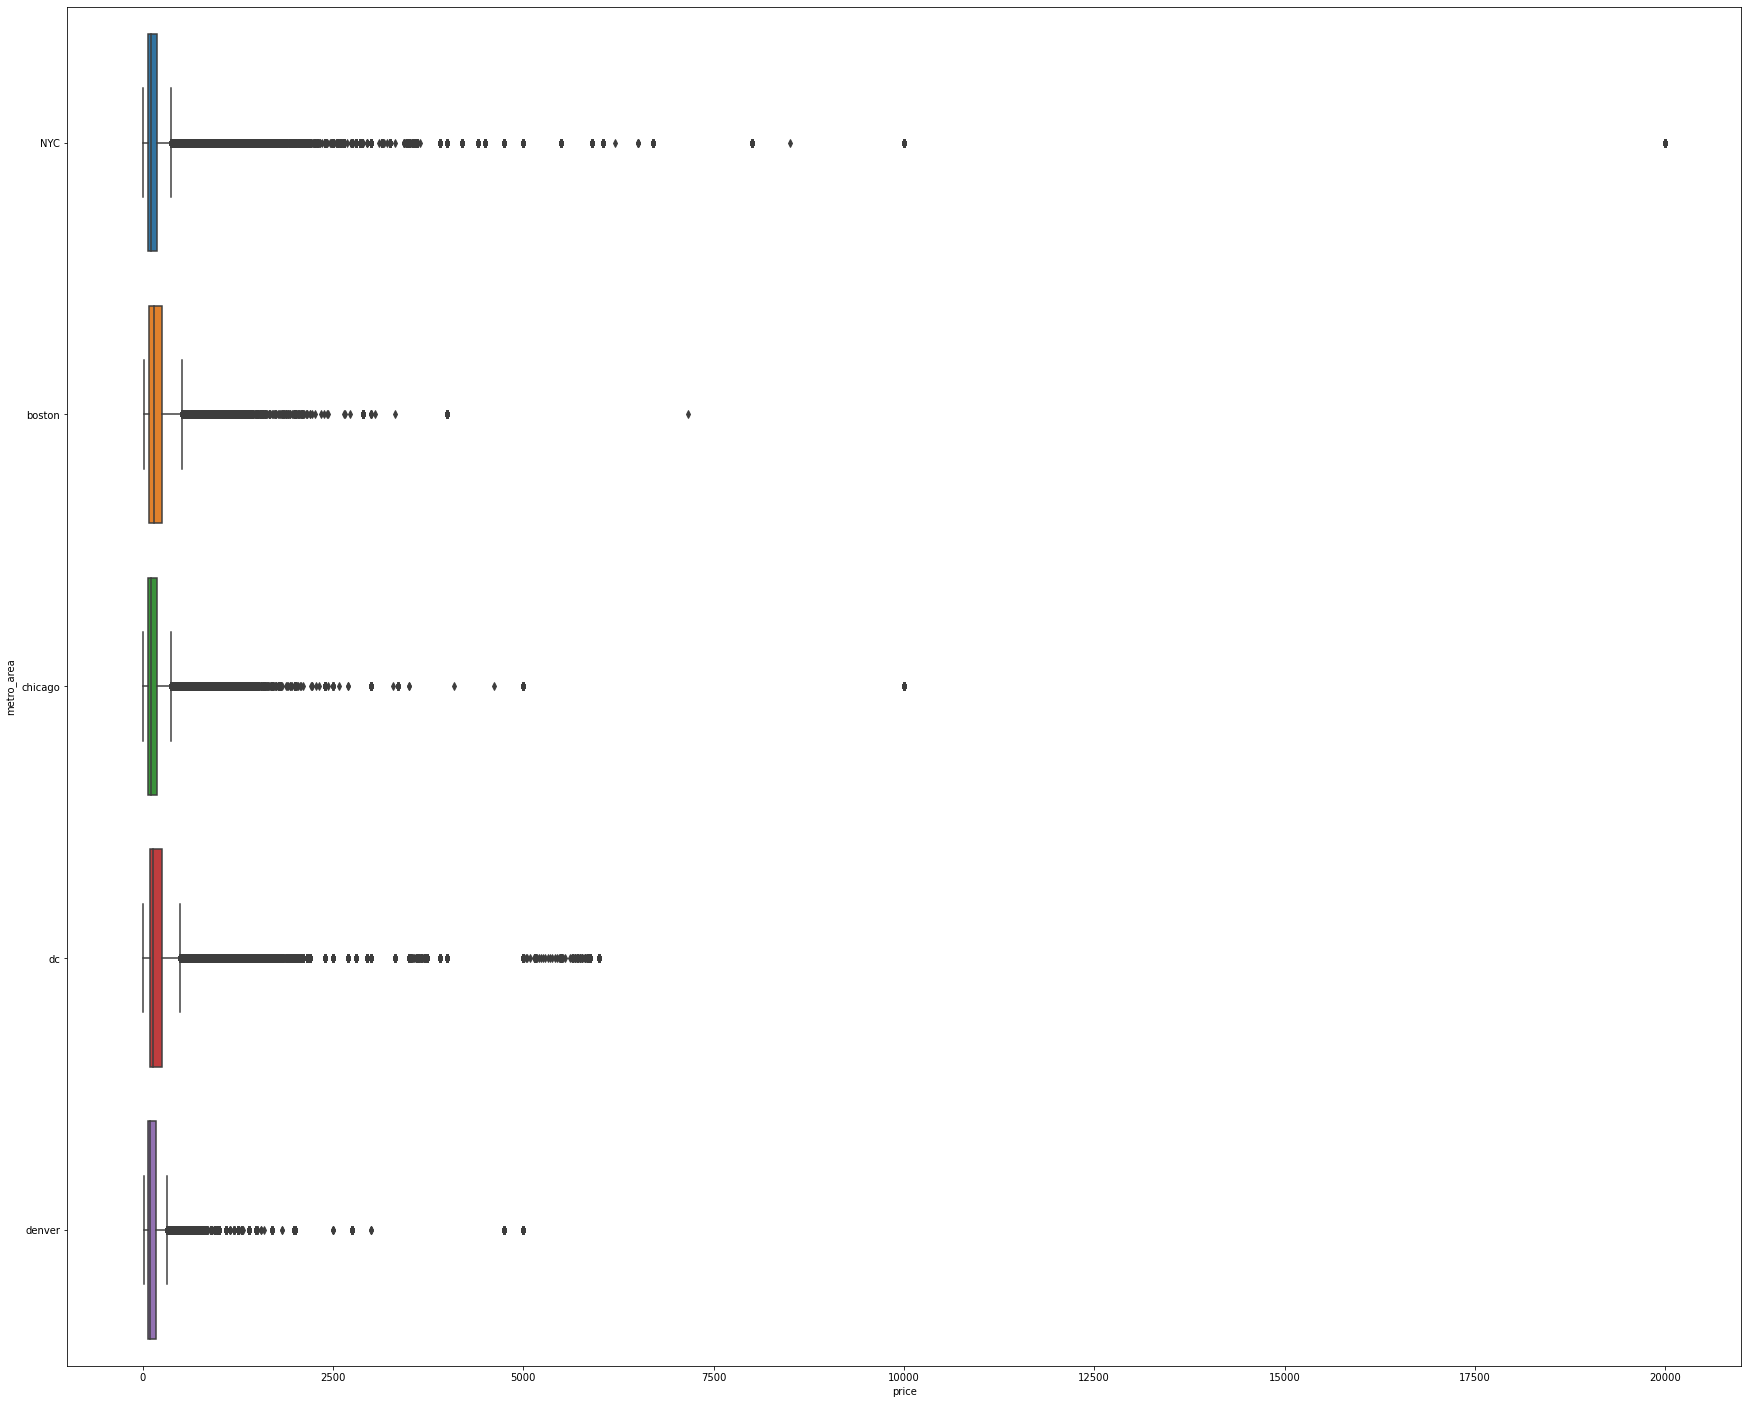

In [25]:
fig,ax = plt.subplots(figsize=(30,25))
sns.boxplot(y=calendarDF['metro_area'], x=calendarDF['price'])

In [26]:
calendarDF.head()

,listing_id,date,available,price,metro_area,yearDate,monthDate
15246780,8403139,2016-05-17,f,NaN,denver,2016,5
15404095,9491180,2016-05-17,f,NaN,denver,2016,5
15601560,1197430,2016-05-17,f,NaN,denver,2016,5
15427455,12292295,2016-05-17,f,NaN,denver,2016,5
15058440,2139342,2016-05-17,f,NaN,denver,2016,5


In [27]:
calendarDF[calendarDF['available'] == 't'].head()

,listing_id,date,available,price,metro_area,yearDate,monthDate
15690620,1086049,2016-05-17,t,186.0,denver,2016,5
15041285,8482535,2016-05-17,t,350.0,denver,2016,5
15477460,10454584,2016-05-17,t,100.0,denver,2016,5
15375990,10613165,2016-05-17,t,65.0,denver,2016,5
14916090,12072343,2016-05-17,t,140.0,denver,2016,5


In [28]:
listingDF.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability',
       'host_id', 'id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode'],
      dtype='object')

In [29]:
listingDF['id'] = listingDF['id'].astype('string')
listingDF['host_id'] = listingDF['host_id'].astype('string')

In [30]:
listingDF[listingDF['host_id'] == '1086049']

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode


In [31]:
result = calendarDF.merge(listingDF, left_on='listing_id',  right_on='id')

In [32]:
result[result['available'] == 't'][['listing_id', 'id', 'price_x', 'price_y']]

,listing_id,id,price_x,price_y
47,8403139,8403139,95.0,75.0
48,8403139,8403139,95.0,75.0
49,8403139,8403139,95.0,75.0
50,8403139,8403139,95.0,75.0
51,8403139,8403139,85.0,75.0
...,...,...,...,...
21835935,8704613,8704613,100.0,100.0
21835936,8704613,8704613,115.0,100.0
21835937,8704613,8704613,115.0,100.0
21835938,8704613,8704613,100.0,100.0


In [33]:
len(list(calendarDF['listing_id'].unique()))

59838

In [34]:
len(list(result['listing_id'].unique()))


59824

In [35]:
calendarDF['metro_area'].unique()

['denver', 'boston', 'NYC', 'chicago', 'dc']
Categories (5, object): ['denver', 'boston', 'NYC', 'chicago', 'dc']

In [36]:
listingDF['state'].unique()

array(['NY', 'MP', 'NJ', 'VT', 'CO', 'IL', 'MA', 'DC', 'MD'], dtype=object)

In [37]:
listingDF

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,...,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59819,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",0,1.0,Real Bed,1.0,1.0,flexible,silver spring,NaN,...,9.0,8.0,9.0,8.0,80.0,9.0,Private room,MD,NaN,20910
59820,5.0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",20,1.0,Real Bed,1.0,2.0,flexible,bethesda,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,MD,NaN,20816
59821,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",13,1.0,Real Bed,1.0,3.0,strict,temple hills,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Private room,MD,NaN,20748
59822,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",12,1.0,Real Bed,1.0,1.0,moderate,silver spring,NaN,...,10.0,9.0,10.0,10.0,100.0,10.0,Entire home/apt,MD,NaN,20910


In [38]:
listingDF.dtypes

accommodates                   float64
amenities                       object
availability_30                  int64
bathrooms                      float64
bed_type                        object
bedrooms                       float64
beds                           float64
cancellation_policy             object
city                            object
has_availability               float64
host_id                         string
id                              string
instant_bookable                object
latitude                       float64
longitude                      float64
metropolitan                    object
name                            object
price                          float64
property_type                   object
review_scores_checkin          float64
review_scores_cleanliness      float64
review_scores_communication    float64
review_scores_location         float64
review_scores_rating           float64
review_scores_value            float64
room_type                

In [39]:
calendarDF.dtypes

listing_id            string
date          datetime64[ns]
available           category
price                float64
metro_area          category
yearDate            category
monthDate           category
dtype: object

In [40]:
calendarDF[(calendarDF['listing_id'] == '8704613') & (calendarDF['available'] == 't')]

,listing_id,date,available,price,metro_area,yearDate,monthDate
21278020,8704613,2017-05-30,t,100.0,dc,2017,5
21278019,8704613,2017-05-31,t,100.0,dc,2017,5
21278018,8704613,2017-06-01,t,100.0,dc,2017,6
21278017,8704613,2017-06-02,t,115.0,dc,2017,6
21278016,8704613,2017-06-03,t,115.0,dc,2017,6
...,...,...,...,...,...,...,...
21277800,8704613,2017-11-02,t,100.0,dc,2017,11
21277799,8704613,2017-11-03,t,115.0,dc,2017,11
21277798,8704613,2017-11-04,t,115.0,dc,2017,11
21277797,8704613,2017-11-05,t,100.0,dc,2017,11


In [41]:
calendarDF[(calendarDF['listing_id'] == '8704613') & (calendarDF['available'] == 'f')]

,listing_id,date,available,price,metro_area,yearDate,monthDate
21278039,8704613,2017-05-11,f,NaN,dc,2017,5
21278038,8704613,2017-05-12,f,NaN,dc,2017,5
21278037,8704613,2017-05-13,f,NaN,dc,2017,5
21278036,8704613,2017-05-14,f,NaN,dc,2017,5
21278035,8704613,2017-05-15,f,NaN,dc,2017,5
...,...,...,...,...,...,...,...
21277861,8704613,2018-05-06,f,NaN,dc,2018,5
21277860,8704613,2018-05-07,f,NaN,dc,2018,5
21277859,8704613,2018-05-08,f,NaN,dc,2018,5
21277858,8704613,2018-05-09,f,NaN,dc,2018,5


In [42]:
calendarDF[(calendarDF['listing_id'] == '8704613') & (calendarDF['available'] == 't')]

,listing_id,date,available,price,metro_area,yearDate,monthDate
21278020,8704613,2017-05-30,t,100.0,dc,2017,5
21278019,8704613,2017-05-31,t,100.0,dc,2017,5
21278018,8704613,2017-06-01,t,100.0,dc,2017,6
21278017,8704613,2017-06-02,t,115.0,dc,2017,6
21278016,8704613,2017-06-03,t,115.0,dc,2017,6
...,...,...,...,...,...,...,...
21277800,8704613,2017-11-02,t,100.0,dc,2017,11
21277799,8704613,2017-11-03,t,115.0,dc,2017,11
21277798,8704613,2017-11-04,t,115.0,dc,2017,11
21277797,8704613,2017-11-05,t,100.0,dc,2017,11


In [43]:
calendarDF[(calendarDF['listing_id'] == '8704613') & (calendarDF['available'] == 'f')]

,listing_id,date,available,price,metro_area,yearDate,monthDate
21278039,8704613,2017-05-11,f,NaN,dc,2017,5
21278038,8704613,2017-05-12,f,NaN,dc,2017,5
21278037,8704613,2017-05-13,f,NaN,dc,2017,5
21278036,8704613,2017-05-14,f,NaN,dc,2017,5
21278035,8704613,2017-05-15,f,NaN,dc,2017,5
...,...,...,...,...,...,...,...
21277861,8704613,2018-05-06,f,NaN,dc,2018,5
21277860,8704613,2018-05-07,f,NaN,dc,2018,5
21277859,8704613,2018-05-08,f,NaN,dc,2018,5
21277858,8704613,2018-05-09,f,NaN,dc,2018,5


In [44]:
calendarDF.describe()

,price
count,8.618452e+06
mean,1.772158e+02
std,2.716685e+02
min,1.000000e+01
25%,7.500000e+01
50%,1.200000e+02
75%,2.000000e+02
max,2.000000e+04


In [45]:
calendarDF.count()

listing_id    21841235
date          21841235
available     21841235
price          8618452
metro_area    21841235
yearDate      21841235
monthDate     21841235
dtype: int64

In [46]:
calendarDFUnavailable = calendarDF[calendarDF['available'] == 'f']
calendarDFUnavailable

,listing_id,date,available,price,metro_area,yearDate,monthDate
15246780,8403139,2016-05-17,f,NaN,denver,2016,5
15404095,9491180,2016-05-17,f,NaN,denver,2016,5
15601560,1197430,2016-05-17,f,NaN,denver,2016,5
15427455,12292295,2016-05-17,f,NaN,denver,2016,5
15058440,2139342,2016-05-17,f,NaN,denver,2016,5
...,...,...,...,...,...,...,...
21704725,16611501,2018-05-10,f,NaN,dc,2018,5
20525045,9759707,2018-05-10,f,NaN,dc,2018,5
19980100,16481370,2018-05-10,f,NaN,dc,2018,5
19794588,11337494,2018-05-10,f,NaN,dc,2018,5


In [47]:
citiesList = list(calendarDFUnavailable['metro_area'].unique())
citiesList

['denver', 'boston', 'NYC', 'chicago', 'dc']

<BarContainer object of 12 artists>

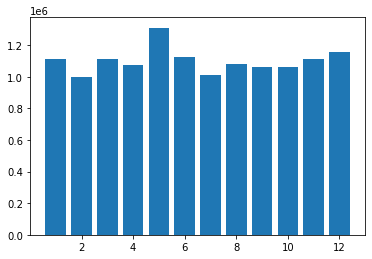

In [48]:
test = calendarDFUnavailable.groupby('monthDate').size().reset_index(name='count')
plt.bar(test['monthDate'], test['count'])

### General Occupancy

In [49]:
generalOccupancy = calendarDF[calendarDF['available'] == 'f']['available'].count()/calendarDF['available'].count()
print(str(generalOccupancy*100)+" %")

60.540454786553966 %


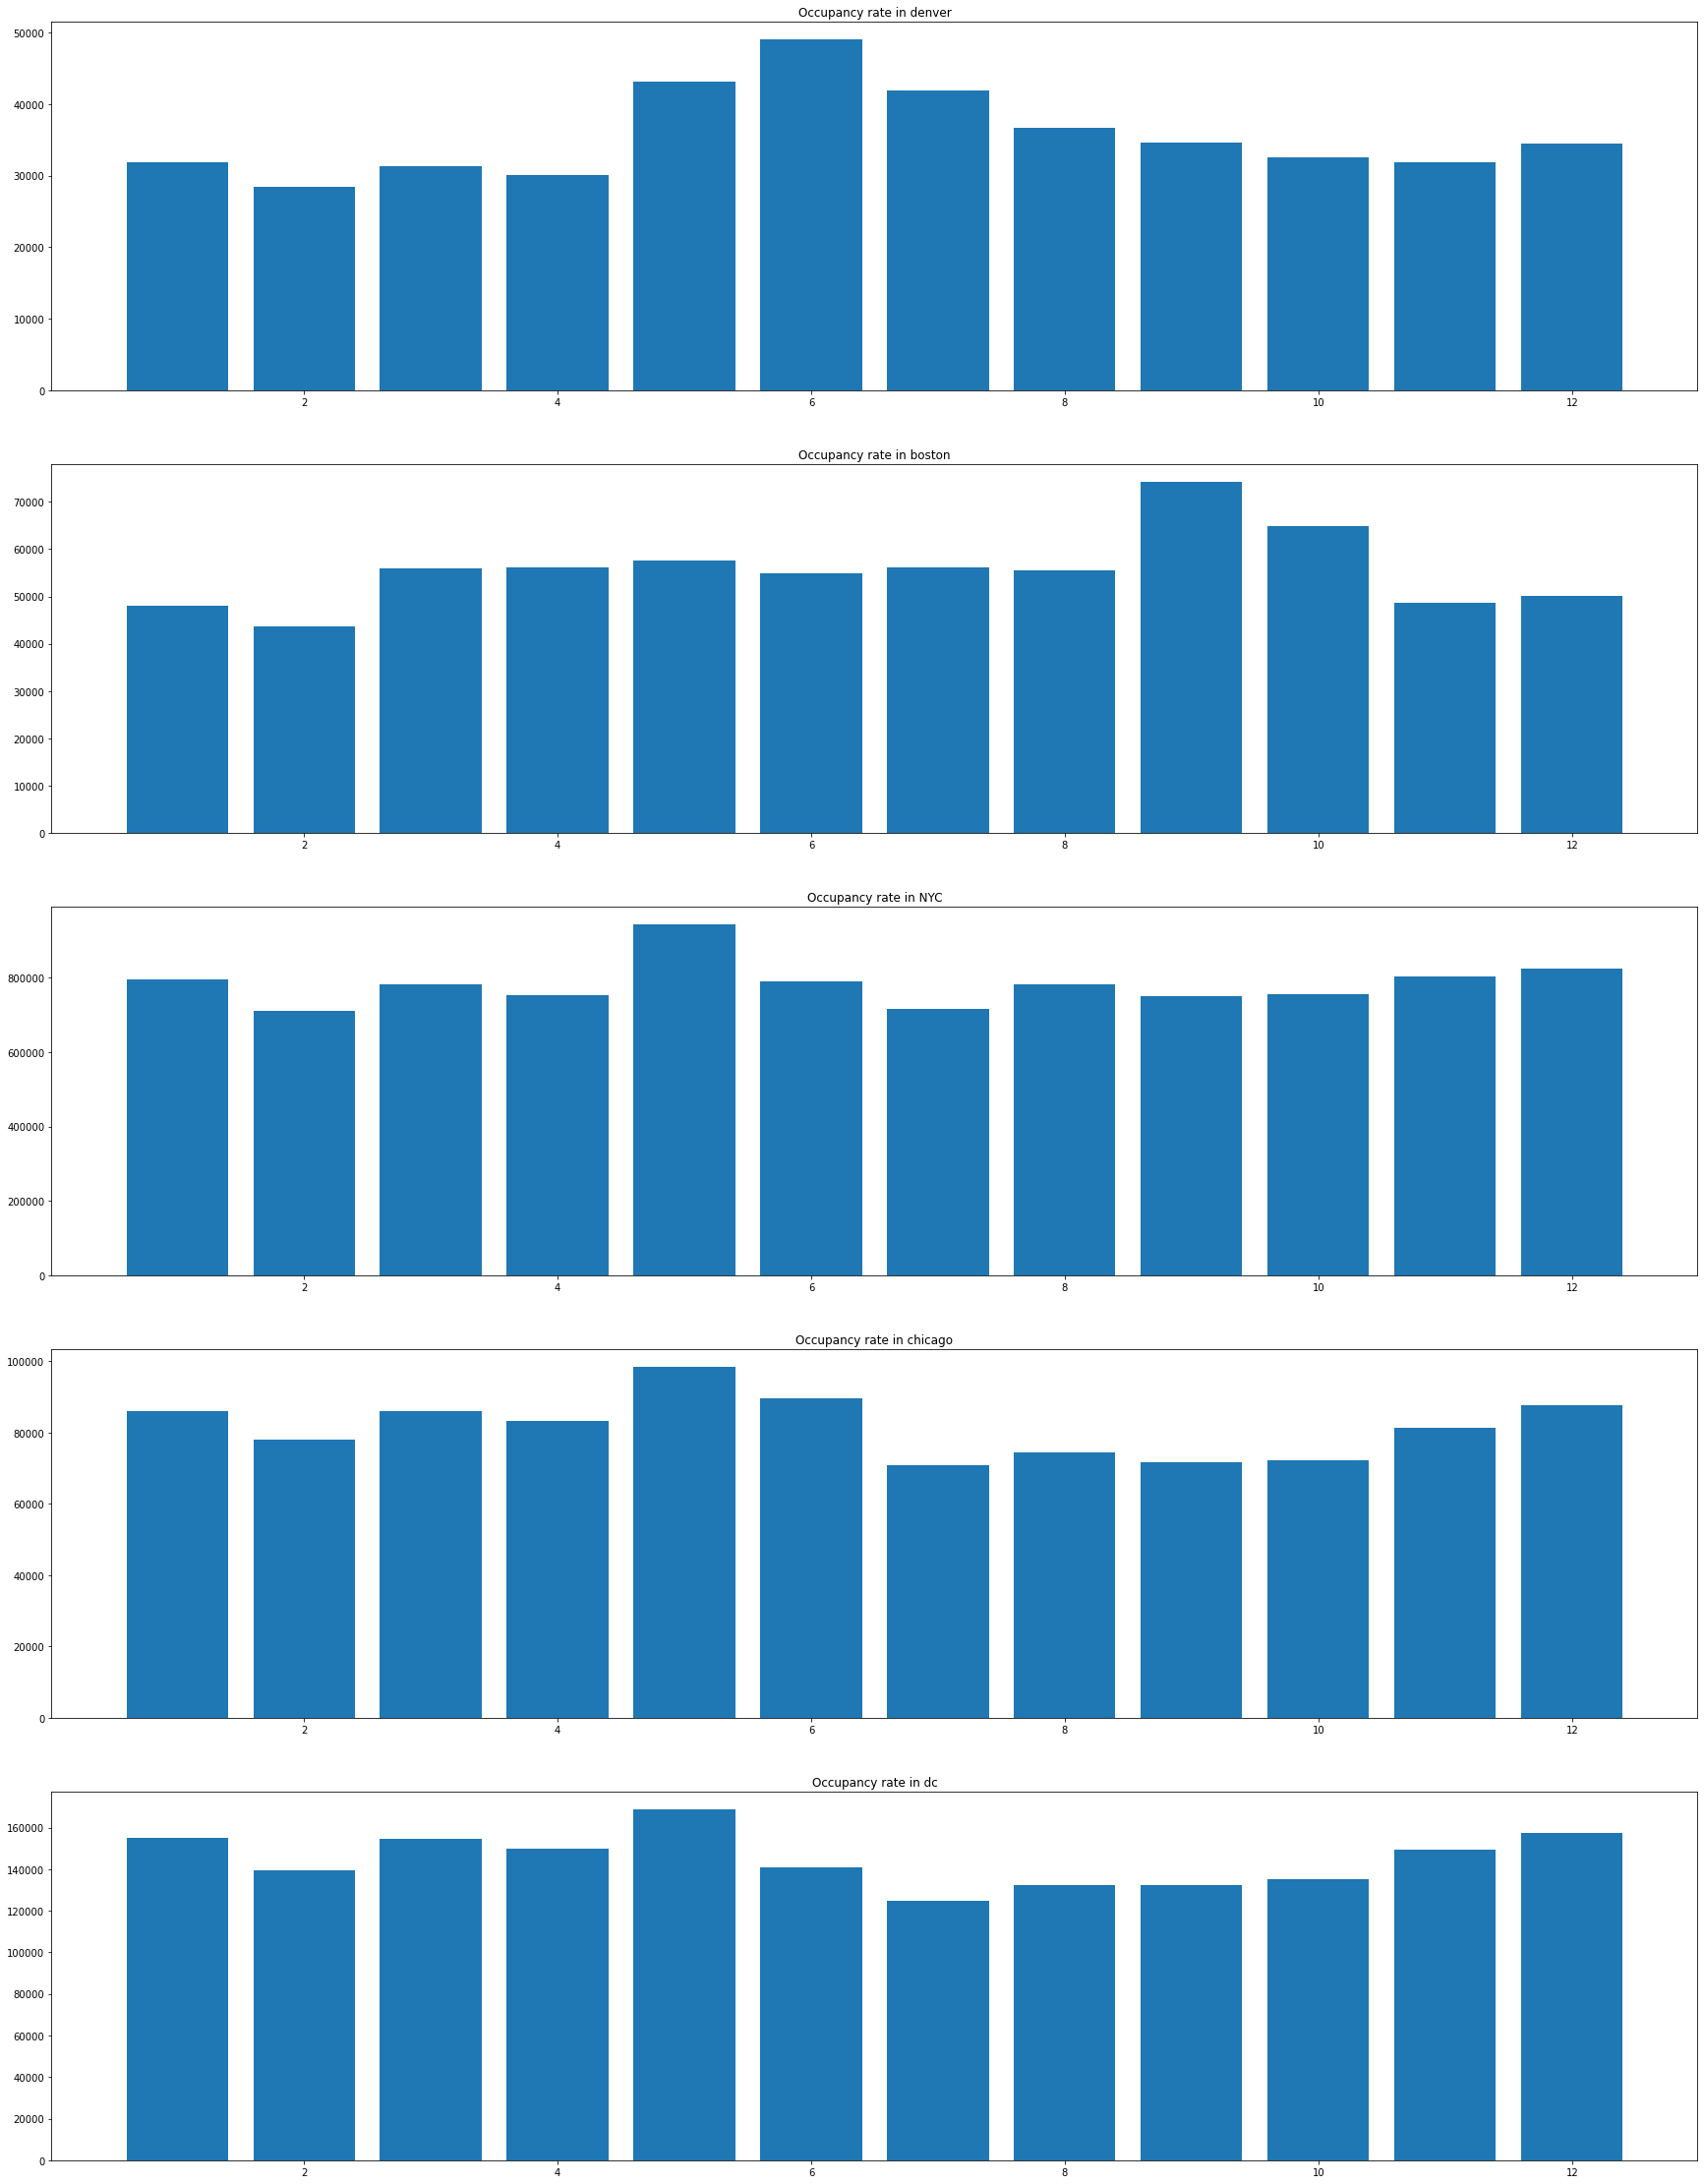

In [50]:
fig, ax = plt.subplots(5,1,figsize=(30,40))

for i in range(len(citiesList)):
    partialDF = calendarDFUnavailable[calendarDFUnavailable['metro_area'] == citiesList[i]]
    partialDF = partialDF.groupby('monthDate').size().reset_index(name='count')
    ax[i].bar(partialDF['monthDate'], partialDF['count'])
    ax[i].set_title('Occupancy rate in '+citiesList[i])

In [51]:
for i in range(len(citiesList)):
    print('City: '+citiesList[i])
    
    partialDF = calendarDF[calendarDF['metro_area'] == citiesList[i]]
    partialDF = partialDF.groupby('monthDate').size().reset_index(name='count')
    partialDFUnavailable = calendarDF[(calendarDF['metro_area'] == citiesList[i]) & (calendarDF['available'] == 'f')]
    partialDFUnavailable = partialDFUnavailable.groupby('monthDate').size().reset_index(name='count')
    cityAvailability = partialDFUnavailable['count']/partialDF['count']
    print(cityAvailability)

City: denver
0     0.410238
1     0.405689
2     0.403322
3     0.400279
4     0.555869
5     0.651737
6     0.538626
7     0.471470
8     0.460279
9     0.418775
10    0.424298
11    0.444633
Name: count, dtype: float64
City: boston
0     0.431652
1     0.434208
2     0.503616
3     0.522383
4     0.517838
5     0.509844
6     0.505577
7     0.500198
8     0.689552
9     0.583101
10    0.452612
11    0.451298
Name: count, dtype: float64
City: NYC
0     0.629346
1     0.623003
2     0.619595
3     0.616849
4     0.746681
5     0.647173
6     0.566932
7     0.618215
8     0.614327
9     0.598732
10    0.656996
11    0.653208
Name: count, dtype: float64
City: chicago
0     0.533531
1     0.534349
2     0.533104
3     0.533167
4     0.609948
5     0.573459
6     0.439080
7     0.461544
8     0.459676
9     0.447753
10    0.520383
11    0.543047
Name: count, dtype: float64
City: dc
0     0.642138
1     0.639945
2     0.640696
3     0.640567
4     0.699459
5     0.602842
6     0.516792
7   